In [1]:
from PIL import Image,ImageDraw,ImageFont
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
path = 'farrington7b/credit card_twitter/7B-twitter-122.jpg'

In [9]:
a = Image.open(path)

In [10]:
print(a.format) #取得圖片格式
print(a.mode) # 获取图片模式,常见有：L（灰度图像），RGB和CMYK（真彩图像）


JPEG
RGB


In [11]:
greyimg=a.convert('L')   #灰度處理1             1位像素，黑和白，存成8位的像素
'''
1             1位像素，黑和白，存成8位的像素
L             8位像素，黑白
P             8位像素，使用调色板映射到任何其他模式
RGB           3×8位像素，真彩
RGBA          4×8位像素，真彩+透明通道
CMYK          4×8位像素，颜色隔离
YCbCr         3×8位像素，彩色视频格式
I             32位整型像素
F             32位浮点型像素

链接：https://www.jianshu.com/p/e8d058767dfa'''

table = get_bin_table()
out = greyimg.point(table,'1')
greyimg.show() 

NameError: name 'get_bin_table' is not defined

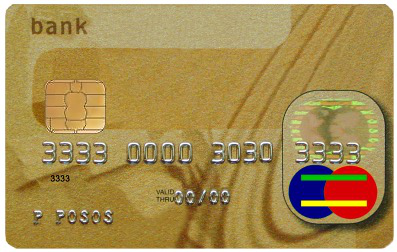

In [12]:
a

In [32]:
r,g,b = a.split()

In [42]:
print(a.getpixel((0,0))[0])#得到像素：

150


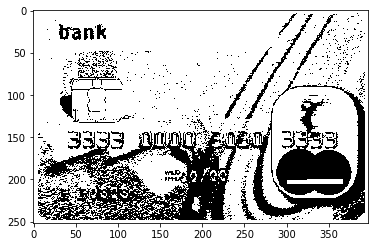

In [13]:
img=np.array(a.convert('L'))

rows,cols=img.shape
for i  in range(rows):
    for j in range(cols):
        if (img[i,j]<=128):
            img[i,j]=0
        else:
            img[i,j]=1

plt.figure('')
plt.imshow(img,cmap="gray")
plt.axis('on')
plt.show()
#https://www.jianshu.com/p/bae4848664ee

import numpy as np 
import cv2 
import matplotlib.pyplotasplt 

图6-1中的矩阵img=np.array([[[255,0,0],[0,255,0],[0,0,255]],[[255,255,0],[255,0,255],[0,255,255]],[[255,255,255],[128,128,128],[0,0,0]],],dtype=np.uint8)

用matplotlib 存储 plt.imsave('img_pyplot.jpg',img)
用OpenCV存储cv2.imwrite('img_cv2.jpg',img)

链接：https://www.jianshu.com/p/7e986a8eb9c6

In [66]:
color_img=cv2.imread(path)
gray_img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
print(color_img.shape)
print(gray_img)

(271, 427, 3)
[[143 145 145 ..., 148 148 148]
 [143 144 144 ..., 147 147 147]
 [144 143 144 ..., 146 146 146]
 ..., 
 [109 106 107 ..., 135 136 137]
 [115 113 113 ..., 135 136 138]
 [120 117 118 ..., 135 136 138]]


In [ ]:


def salt(img, n):
    for k in range(n):
        i = int(np.random.random() * img.shape[1]);  #产生随机数（0~1）*图像的宽
        j = int(np.random.random() * img.shape[0]);  #产生随机数（0~1）*图像的高
        if img.ndim == 2:      #如果图像是二维的 灰度
            img[j, i] = 255
        elif img.ndim == 3:     #如果图像是三维的
            img[j, i, 0] = 255     #分别给三个通道的对应像素点赋值
            img[j, i, 1] = 255
            img[j, i, 2] = 255
    return img

if __name__ == '__main__':
    img = cv2.imread(path)
    saltImage = salt(img, 5000)
    cv2.imshow("Salt", saltImage)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
    #http://blog.csdn.net/sinat_34686158/article/details/63687017